In [13]:
### Import potřebných balíčků pro analýzu MUSIM ZMENIT: NAINTALOVAT TY BALÍČKY, CESTU K OBRÁZKUM 
import matplotlib.pyplot as plt     # vytváření grafů
import numpy as np                  # numerické operace
import astropy.io.fits as fits      # operace se soubory `.fits`
import pandas as pd                 # tabulky
import astropy.units as u           # fyzikální jednotky
from astropy.coordinates import SkyCoord  # objekty souřadnic, převod mezi nimi
from sunpy.coordinates import frames # vztažné soustavy vázané na Slunce

# Rotace Slunce

V této úloze prozkoumáme rotaci naší nejbližší hvězdy - Slunce. Využijeme k tomu snímky z družice [SDO](https://sdo.gsfc.nasa.gov/), změříme pozici slunečních skvrn na slunečním disku a ze změny této pozice vypočítáme rotační rychlost a periodu rotace Slunce.


---
##### *Tento notebook byl zpracován pro workshop v rámci konference Czech Hopes 2025 studentem Astrofyziky na Přírodovědecké fakultě Masarykovy Univerzity. Části kódu byly sepsány s pomocí ChatGPT.

Autor:
Matěj Bárta matejbarta@mail.muni.cz*

# 0. Stažení snímků

# 1. Načtení snímků

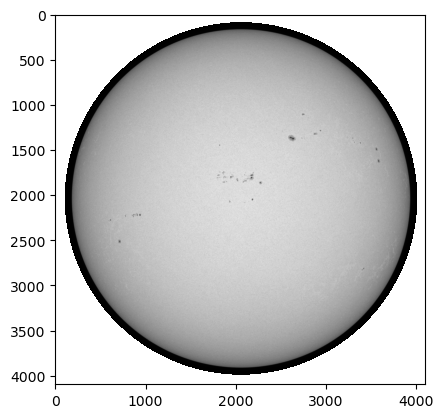

In [32]:
### Načtení snímků do listu ###
%matplotlib inline
## Založení seznamu
snimky = []

## Seznam souborů
soubory = ["./data/SDO1.fits", "./data/SDO2.fits"]

## Otevření snímků
for soubor in soubory:
    snimky.append(fits.open(soubor))

# Pojmenování snímkuů
snimek0 = snimky[0][1]
snimek1 = snimky[1][1]

## Zobrazení snímků

plt.imshow(np.flip(snimek1.data), cmap="gray")
plt.show()

In [31]:
## Informace o snímcích - hlavička
snimek1.header

XTENSION= 'IMAGE   '           / binary table extension                         
BITPIX  =                  -32 / data type of original image                    
NAXIS   =                    2 / dimension of original image                    
NAXIS1  =                 4096 / length of original image axis                  
NAXIS2  =                 4096 / length of original image axis                  
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
DATE    = '2024-07-06T08:06:20'                                                 
DATE-OBS= '2024-07-02T00:00:38.80'                                              
TELESCOP= 'SDO/HMI'                                                             
INSTRUME= 'HMI_FRONT2'                                                          
WAVELNTH= 6173.0                                                                
CAMERA  =                   

# 2. Měření pozice skvrn

Nyní si vytvoříme interaktivní grafiku pomocí které zaznamenáme pozici slunečních skvrn, ta se nám uloží do tabulky 'skvrny'. Vyberte si dobře identifikovatelné skvrny na obou obrázcích, poté klikněte nejprve na skvrnu na levém a posléze pravém obrázku. Toto opakujte pro všechny vybrané skvrny.

<IPython.core.display.Javascript object>


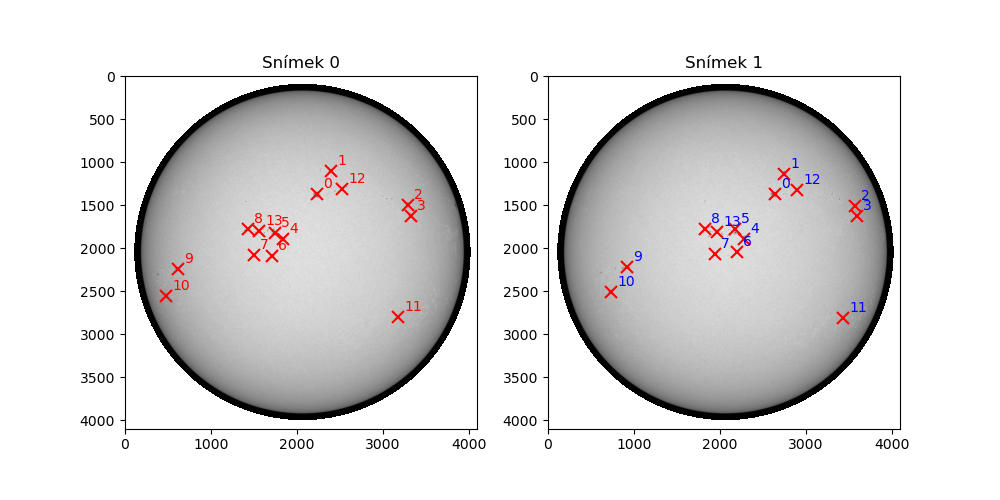

In [37]:
### Vytvoření interaktivních oken ###

# Nastavení grafiky
%matplotlib notebook

# Nové pojmenování snímků
data0 = snimek0.data  
data1 = snimek1.data

# pandas DataFrame (= tabulka) pro uložení souřadnic
skvrny = pd.DataFrame(columns=["Xpx0", "Ypx0", "Xpx1", "Ypx1"])

# Vytvoření grafiky
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(np.flip(data0), cmap="gray")
axes[1].imshow(np.flip(data1), cmap="gray")
axes[0].set_title("Snímek 0")
axes[1].set_title("Snímek 1")

# Proměnné pro sledování klikání
skvrna = {"pocatecní": None, "konecna": None}
index_skvrny = 0  #

## Definice funkce "kliknutí"

def kliknuti(udalost):
    """Stará se o události při kliknutí a uloží souřadnice do tabulky"""
    
    # Použití globálních proměnných
    global skvrna, index_skvrny

    if udalost.inaxes == axes[0]:  # Kliknutí na levý snímek
        skvrna["pocatecní"] = (udalost.xdata, udalost.ydata)
        udalost.inaxes.plot(udalost.xdata, udalost.ydata, "rx", markersize=8, mew=1.5)
        udalost.inaxes.text(udalost.xdata + 70, udalost.ydata - 70, str(index_skvrny), 
                            color="red", fontsize=10)

    elif udalost.inaxes == axes[1] and skvrna["pocatecní"]:  # Kliknutím na pravý až po levém
        skvrna["konecna"] = (udalost.xdata, udalost.ydata)
        udalost.inaxes.plot(udalost.xdata, udalost.ydata, "rx", markersize=8, mew=1.5)
        udalost.inaxes.text(udalost.xdata + 70, udalost.ydata - 70, str(index_skvrny), 
                            color="blue", fontsize=10)

        # Uložení souřadnic do tabulky
        skvrny.loc[len(skvrny)] = [skvrna["pocatecní"][0], skvrna["pocatecní"][1], 
                                   skvrna["konecna"][0], skvrna["konecna"][1]]

        # Příprava na další skvrnu
        skvrna = {"pocatecní": None, "konecna": None}
        index_skvrny += 1  # Increment sunspot index

# Zapojení interaktivity
fig.canvas.mpl_connect("button_press_event", kliknuti)

# Zobrazení grafiky
plt.show(block=True)

In [38]:
skvrny

,Xpx0,Ypx0,Xpx1,Ypx1
0,2231.588774,1372.750065,2641.717290,1372.750065
1,2394.371742,1105.320903,2746.363484,1140.202968
2,3289.678065,1500.650968,3571.905677,1512.278323
3,3324.560129,1628.551871,3595.160387,1628.551871
4,1836.258710,1895.981032,2281.269290,1895.981032
5,1743.239871,1826.216903,2176.623097,1779.707484
6,1708.357806,2093.646065,2199.877806,2047.136645
7,1499.065419,2082.018710,1944.076000,2070.391355
8,1429.301290,1779.707484,1827.802452,1779.707484
9,615.386452,2244.801677,920.868774,2221.546968


In [39]:
## Přepočet z px polohy na úhlové

skvrny["X0"] = snimek0.header["CDELT1"] * (skvrny["Xpx0"] - (snimek0.header["CRPIX1"]))
skvrny["Y0"] = snimek0.header["CDELT2"] * ((snimek0.header["CRPIX2"] - skvrny["Ypx0"]))

skvrny["X1"] = snimek1.header["CDELT1"] * (skvrny["Xpx1"] - (snimek1.header["CRPIX1"]))
skvrny["Y1"] = snimek1.header["CDELT2"] * ((snimek1.header["CRPIX2"] - skvrny["Ypx1"]))

skvrny

,Xpx0,Ypx0,Xpx1,Ypx1,X0,Y0,X1,Y1
0,2231.588774,1372.750065,2641.717290,1372.750065,97.659512,343.612359,304.690297,343.643010
1,2394.371742,1105.320903,2746.363484,1140.202968,179.707988,478.406284,357.435955,460.855583
2,3289.678065,1500.650968,3571.905677,1512.278323,630.974606,279.145700,773.540591,273.315466
3,3324.560129,1628.551871,3595.160387,1628.551871,648.556422,214.679040,785.261848,214.709179
4,1836.258710,1895.981032,2281.269290,1895.981032,-101.601072,79.885115,123.010808,79.914719
5,1743.239871,1826.216903,2176.623097,1779.707484,-148.485915,115.048748,70.265150,138.521006
6,1708.357806,2093.646065,2199.877806,2047.136645,-166.067732,-19.745177,81.986407,3.726546
7,1499.065419,2082.018710,1944.076000,2070.391355,-271.558629,-13.884572,-46.947424,-7.994711
8,1429.301290,1779.707484,1827.802452,1779.707484,-306.722262,138.491169,-105.553711,138.521006
9,615.386452,2244.801677,920.868774,2221.546968,-716.964641,-95.933048,-562.682748,-84.182884


# 3. Převod souřadnic

Nyní máme změřenou pozici skvrn na snímku, pro náš výpočet ovšem potřebujeme mít souřadnice vztažené k povrchu Slunce. Teď tedy provedeme převod mezi vztažnými soustavami.

Heliografické souřadnice: https://www.pozorovanislunce.eu/vykladovy-slovnicek/heliograficke-souradnice.html


In [40]:
### Převod souřadnic ###

## Definování pozice pozorovatele v cílové soustavě
SDO_poz0 = SkyCoord(lon=0 * u.deg, lat=snimek0.header["CRLT_OBS"] * u.deg, 
                    radius=snimek0.header["DSUN_OBS"] * u.m, 
                    frame=frames.HeliographicStonyhurst, 
                    obstime=snimek0.header["DATE-OBS"])
cas_poz0 = snimek0.header["DATE-OBS"]

SDO_poz1 = SkyCoord(lon=0 * u.deg, lat=snimek1.header["CRLT_OBS"] * u.deg, 
                    radius=snimek1.header["DSUN_OBS"] * u.m, 
                    frame=frames.HeliographicStonyhurst, 
                    obstime=snimek1.header["DATE-OBS"])
cas_poz1 = snimek1.header["DATE-OBS"]


SDO_poz0, SDO_poz1

(<SkyCoord (HeliographicStonyhurst: obstime=2024-07-01T00:00:38.800, rsun=695700.0 km): (lon, lat, radius) in (deg, deg, m)
     (0., 2.901182, 1.52074902e+11)>,
 <SkyCoord (HeliographicStonyhurst: obstime=2024-07-02T00:00:38.800, rsun=695700.0 km): (lon, lat, radius) in (deg, deg, m)
     (0., 3.011335, 1.52078291e+11)>)

In [41]:
### Definice funkce pro převod souřadnic ###

def prevod_souradnic(X, Y, pozorovatel, cas_poz):
    """Převod souřadnic ze snímku na Heliografické Stonyhurstovy
        
        Parametry:
            X ... x-ové souřadnice k převodu
            Y ... y-ové souřadnice k převodu
            pozorovatel ... SkyCoord pozice pozorovatele
            cas_poz ... čas pozorování
    """
    
    # Vytvoření SkyCoord objektu skvrn - pozice skvrn v soustavě vztažené k SDO
    skvrny_snimek = SkyCoord(Tx = X * u.arcsec, Ty = Y * u.arcsec, 
                      frame = frames.Helioprojective, 
                      observer = pozorovatel, 
                      obstime = cas_poz)
    
    # Převod souřadnic do nové soustavy = vztažené ke Slunci
    skvrny_slunce = skvrny_snimek.transform_to(frames.HeliographicStonyhurst)
    
    # Vrácení přepočítaných hodnot z funkce
    return skvrny_slunce.lat.value, skvrny_slunce.lon.value

In [42]:
## Převod souřadnic a uložení do tabulky
# b ... heliografická šířka
# l ... heliografická délka

skvrny["b0"], skvrny["l0"] = prevod_souradnic(skvrny["X0"], skvrny["Y0"], SDO_poz0, cas_poz0)
skvrny["b1"], skvrny["l1"] = prevod_souradnic(skvrny["X1"], skvrny["Y1"], SDO_poz1, cas_poz1)

skvrny

,Xpx0,Ypx0,Xpx1,Ypx1,X0,Y0,X1,Y1,b0,l0,b1,l1
0,2231.588774,1372.750065,2641.717290,1372.750065,97.659512,343.612359,304.690297,343.643010,24.143370,6.484648,24.090558,20.628124
1,2394.371742,1105.320903,2746.363484,1140.202968,179.707988,478.406284,357.435955,460.855583,33.162528,13.098610,31.827809,26.374704
2,3289.678065,1500.650968,3571.905677,1512.278323,630.974606,279.145700,773.540591,273.315466,19.218817,44.905292,18.344797,59.510518
3,3324.560129,1628.551871,3595.160387,1628.551871,648.556422,214.679040,785.261848,214.709179,15.161142,45.222836,14.681502,59.126602
4,1836.258710,1895.981032,2281.269290,1895.981032,-101.601072,79.885115,123.010808,79.914719,7.718652,-6.209577,7.821904,7.527112
5,1743.239871,1826.216903,2176.623097,1779.707484,-148.485915,115.048748,70.265150,138.521006,9.836217,-9.148397,11.406141,4.337069
6,1708.357806,2093.646065,2199.877806,2047.136645,-166.067732,-19.745177,81.986407,3.726546,1.662680,-10.094630,3.225288,4.969743
7,1499.065419,2082.018710,1944.076000,2070.391355,-271.558629,-13.884572,-46.947424,-7.994711,1.940095,-16.660025,2.524399,-2.841616
8,1429.301290,1779.707484,1827.802452,1779.707484,-306.722262,138.491169,-105.553711,138.521006,11.143565,-19.261730,11.395511,-6.522956
9,615.386452,2244.801677,920.868774,2221.546968,-716.964641,-95.933048,-562.682748,-84.182884,-3.933609,-49.408344,-2.680741,-36.498197


# 4. Analýza naměřených údajů

Nyní zpracujeme získané souřadnice skvrn. Úhlovou rotační rychlost vypočítáme jako ....

In [43]:
### Výpočty z naměřených dat ###

## Úhlové rychlosti skvrn
skvrny['omega'] = skvrny['l1'] - skvrny['l0']

## Perioda rotace
skvrny['T'] = 360 / skvrny['omega']

## Zobrazení tabulky
print(skvrny)

           Xpx0         Ypx0         Xpx1         Ypx1          X0  \
0   2231.588774  1372.750065  2641.717290  1372.750065   97.659512   
1   2394.371742  1105.320903  2746.363484  1140.202968  179.707988   
2   3289.678065  1500.650968  3571.905677  1512.278323  630.974606   
3   3324.560129  1628.551871  3595.160387  1628.551871  648.556422   
4   1836.258710  1895.981032  2281.269290  1895.981032 -101.601072   
5   1743.239871  1826.216903  2176.623097  1779.707484 -148.485915   
6   1708.357806  2093.646065  2199.877806  2047.136645 -166.067732   
7   1499.065419  2082.018710  1944.076000  2070.391355 -271.558629   
8   1429.301290  1779.707484  1827.802452  1779.707484 -306.722262   
9    615.386452  2244.801677   920.868774  2221.546968 -716.964641   
10   475.858194  2558.740258   734.831097  2512.230839 -787.291907   
11  3173.404516  2802.914710  3432.377419  2814.542065  572.368552   
12  2522.272645  1314.613290  2897.519097  1326.240645  244.174648   
13  1557.202194  180

## Doplňující otázka

*   Jakou jednotku má ω?

In [44]:
## Výpočet průměrné hodnoty
T_prum = skvrny["T"].mean()
om_prum = skvrny["omega"].mean()
T_prum, om_prum

(26.409547937395782, 13.662537942932213)

# 5. Vizualizace výsledků

V předchozí části jsme spočítali úhlovou rychlost pro jednotlivé skvrny = sluneční šířky. Pro lepší čitelnost výsledků je nyní převedeme do grafu.

**Diskuze:**
1. Co vidíme v grafu?
2. Co nám to říká o rotaci Slunce?

Text(0, 0.5, 'Heliografická šířka b [deg]')

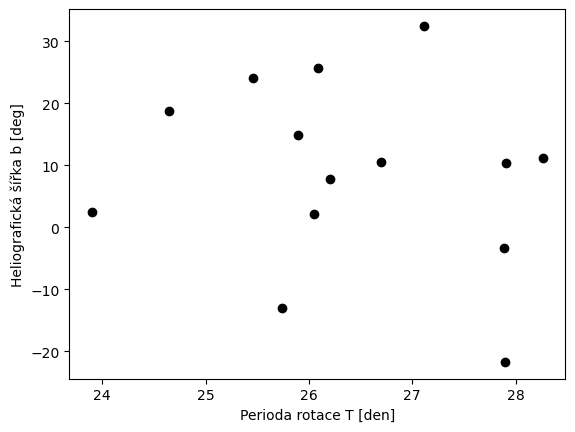

In [45]:
# Hodnoty pro osy grafu
%matplotlib inline

xData = (skvrny['b0'] + skvrny["b1"]) / 2
yData = skvrny['T']

plt.plot(yData, xData, "ok")
plt.xlabel("Perioda rotace T [den]")
plt.ylabel("Heliografická šířka b [deg]")

Reálná rotace Slunce: https://www.nasa.gov/image-article/solar-rotation-varies-by-latitude/
* Jakto že se výsledky rozchází?